# Process Bike Data
Take raw trips data and aggregate by date and user type.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
def aggregate_bike_df(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = df.groupby(['start_date', 'user_type']) \
        .agg(num_trips = ("duration_sec", "count"),
            avg_duration = ("duration_sec",'mean')) \
        .reset_index()
    return df_agg

In [3]:
def clean_bike_fields(df: pd.DataFrame) -> pd.DataFrame:
    df['start_time_dt'] = pd.to_datetime(df['start_time'])
    df['end_time_dt'] = pd.to_datetime(df['end_time'])
    df['start_date'] = df['start_time_dt'].dt.date
    return df

In [4]:
def feed_bike_files(file_path: str, selected_cols: list, v: int) -> tuple[pd.DataFrame, list]:
    '''
    Process and combine files from specified file_path

    Inputs: 
        file_path: the directory where files to be processed are located
        selected_cols: which variables in the dataframe are required from each file
        v: verbosity level (0=None, 1=All)

    Outputs:
        combined dataframe and list of files that could not be processed.
    '''
    files =  os.listdir(file_path)
    df_combo = pd.DataFrame()
    error_log = []    
    for i, f in enumerate(files):
        if v > 0:
            print(f"PROCESS FILE {i}: {f}")
        df = pd.read_csv(file_path + f)
        try:
            df = df[selected_cols]
        except:
            print(f"WARNING - required columns are not present in {f}")
            error_log.append(f)
            continue
        df_clean = clean_bike_fields(df)
        df_agg = aggregate_bike_df(df_clean)
        df_combo = pd.concat([df_combo, df_agg])

    return (df_combo, error_log)

In [6]:
file_path = '../../data/raw/bike-trips/'
sc = ['duration_sec', 'start_time', 'end_time', 'user_type']
df_combo, err = feed_bike_files(file_path=file_path, selected_cols=sc, v=0)

/var/folders/h1/bx_cjpyx3b74dlfph6x6vk3c0000gn/T/ipykernel_11936/3109460454.py:9: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path + f)
/var/folders/h1/bx_cjpyx3b74dlfph6x6vk3c0000gn/T/ipykernel_11936/3109460454.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path + f)
/var/folders/h1/bx_cjpyx3b74dlfph6x6vk3c0000gn/T/ipykernel_11936/3109460454.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path + f)
/var/folders/h1/bx_cjpyx3b74dlfph6x6vk3c0000gn/T/ipykernel_11936/3109460454.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path + f)


<Axes: xlabel='num_trips', ylabel='Count'>

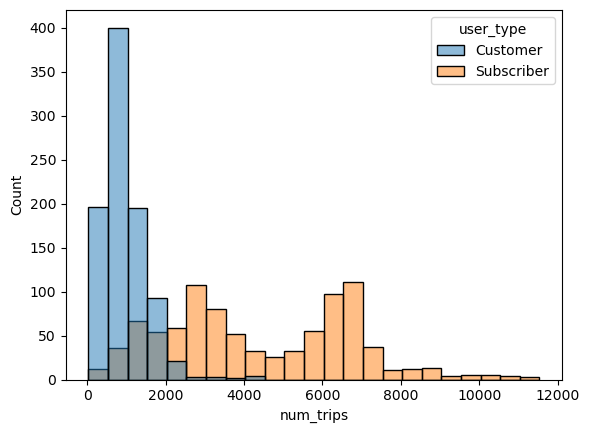

In [7]:
sns.histplot(data=df_combo, x='num_trips', hue='user_type')

<Axes: xlabel='avg_duration', ylabel='Count'>

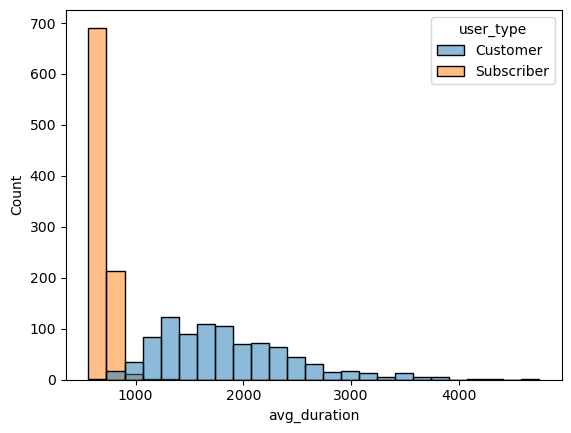

In [8]:
sns.histplot(data=df_combo, x='avg_duration', hue='user_type')

In [ ]:
def get_type(s):
    return s.dtype

df.apply(get_type, axis=0)

In [10]:
df_combo.head()

,start_date,user_type,num_trips,avg_duration
0,2018-02-01,Customer,523,2005.279159
1,2018-02-01,Subscriber,4272,680.287219
2,2018-02-02,Customer,566,2112.296820
3,2018-02-02,Subscriber,4006,664.059411
4,2018-02-03,Customer,927,2366.887810


In [11]:
df_combo.tail()

,start_date,user_type,num_trips,avg_duration
51,2019-02-26,Subscriber,5030,577.995229
52,2019-02-27,Customer,581,1165.531842
53,2019-02-27,Subscriber,7134,643.361508
54,2019-02-28,Customer,981,1348.260958
55,2019-02-28,Subscriber,8848,648.019100
